**Table of content:**

i) Data collection.

ii) Data cleaning and pre-processing.

*   Handling missing data.
*   Handling duplicate values.

*   Handling outliers.


iii) Univariate analysis

iv) Bivariate analysis

v) Multivariate analysis

vi) Conclusion

**Following are the questions which needs to be asked in the analytics process:**

i) Distribution of room type and neighbourhood groups.

ii) Geographical distribution of listings across different locations in nyc.

iii) Key performing indicators for hosts.

iv) Important features influencing rental prices and occupancy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data collection
# data = pd.read_csv('AB_NYC_2019.csv')
data = pd.read_csv('AB_NYC_2019.csv', encoding='utf-8')

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [5]:
data.shape

(48895, 16)

**Finding Null values**

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# gives quick overview of the distribution of numerical data in the dataframe.
data.describe()
# mean -> Average of the data.
# std -> pread of data
# min -> min value in data
# 25th percentile -> 25th percentile
# 50th percentile -> 50th percentile
# 75th percentile -> 75th percentile
# max -> maximum vlue in the data

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Finding Duplicated data**

In [9]:
data[data.duplicated()].sum()

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

**Data Wrangling**

In [10]:
data.drop(['id','host_name','last_review'],axis=1,inplace=True) # dropping these columns as they are not much into use for analysis
data['name'].fillna('Unknown',inplace=True)  # filling the null entries in name column with 'Unknown'.
mean_reviews_per_month = data['reviews_per_month'].mean() # we are finding the mean value of the reviews per month column
data['reviews_per_month'].fillna(mean_reviews_per_month,inplace=True)
data.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Outlier detection and handling using IQR**

<ipython-input-11-c2a9467d505c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column_name])
<ipython-input-11-c2a9467d505c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column_name])
<ipython-input-11-c2a9467d505c>:9: UserWarning: 

`distplot` is a deprecated function and will b

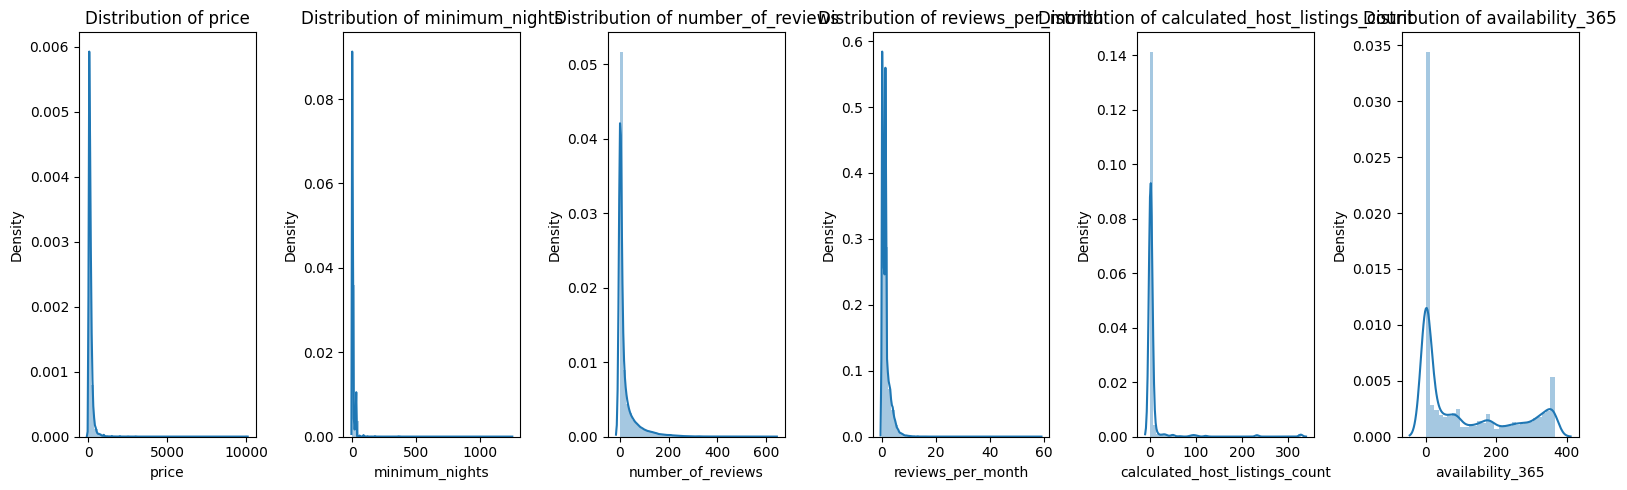

In [11]:
columns_to_plot = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']
num_cols = 6
num_rows = (len(columns_to_plot) + 1) // num_cols

# Create subplots
plt.figure(figsize=(16, 5 * num_rows))
for i, column_name in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.distplot(data[column_name])
    plt.title(f'Distribution of {column_name}')
plt.tight_layout()
plt.show()

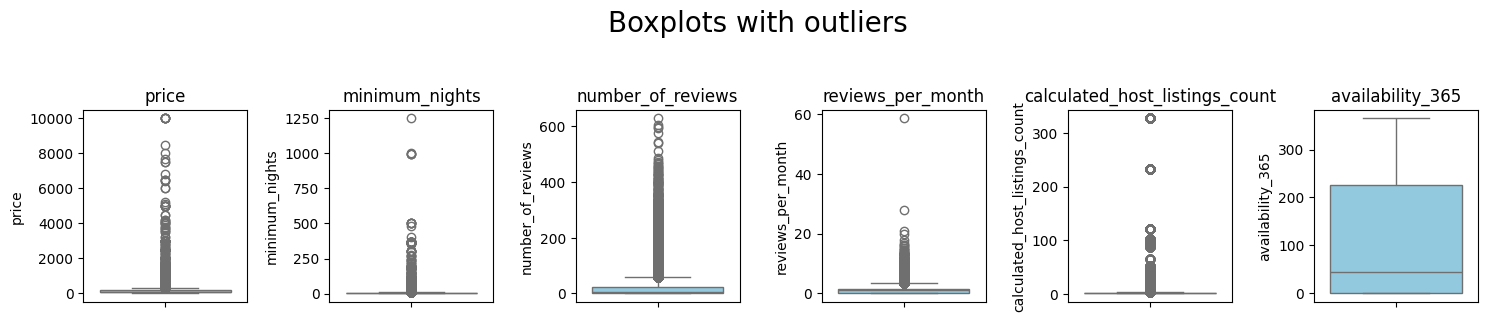

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
data_draw = data.copy()
columns_to_plot = ['price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
plt.figure(figsize=(18, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(data=data_draw[col], color='skyblue')
    plt.title(col)
    plt.xlabel('')

plt.suptitle('Boxplots with outliers',size=20)
plt.show()
# no of outliers-> price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365->3000,6000,6000,4000,7000.

In [13]:
columns_to_treat = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

for column in columns_to_treat:
    percentile25 = data[column].quantile(0.25)
    percentile75 = data[column].quantile(0.75)
    iqr = percentile75 - percentile25
    # calculate upper and lower limits
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    # replace outliers with upper and lower limits
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                            np.where(data[column] < lower_limit, lower_limit,
                                     data[column]))

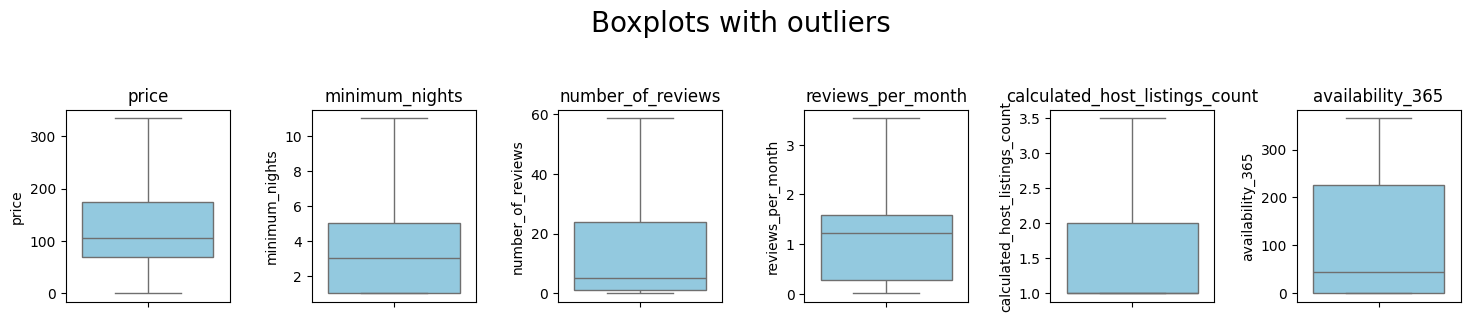

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
data_draw = data.copy()
columns_to_plot = ['price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
plt.figure(figsize=(18, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(data=data_draw[col], color='skyblue')
    plt.title(col)
    plt.xlabel('')

plt.suptitle('Boxplots with outliers', size=20)
plt.show()

**Univariate analysis**

**Distribution of room type**

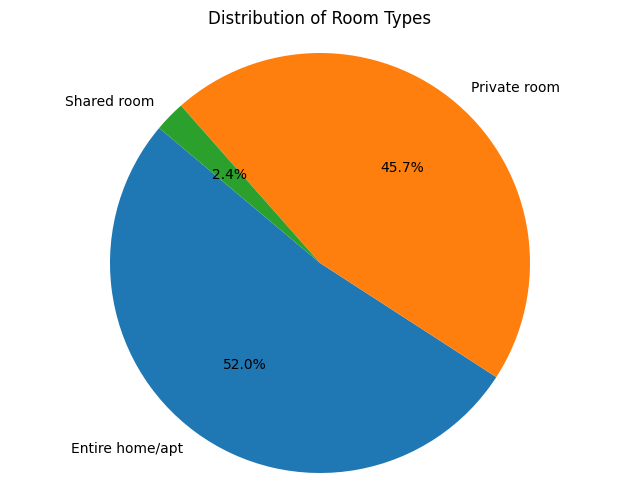

In [15]:
room_type_counts = data['room_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Room Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**Distribution of neighbouring group type**

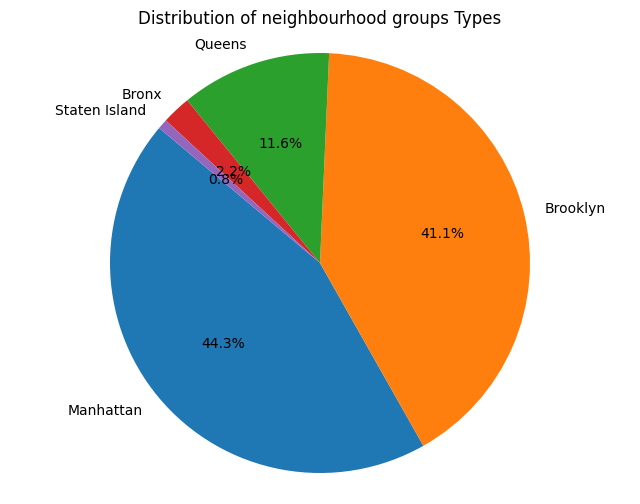

In [16]:
room_type_counts = data['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of neighbourhood groups Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**KDE plot for price column**

<ipython-input-17-b2316008d676>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column_name], shade=True, color='skyblue')


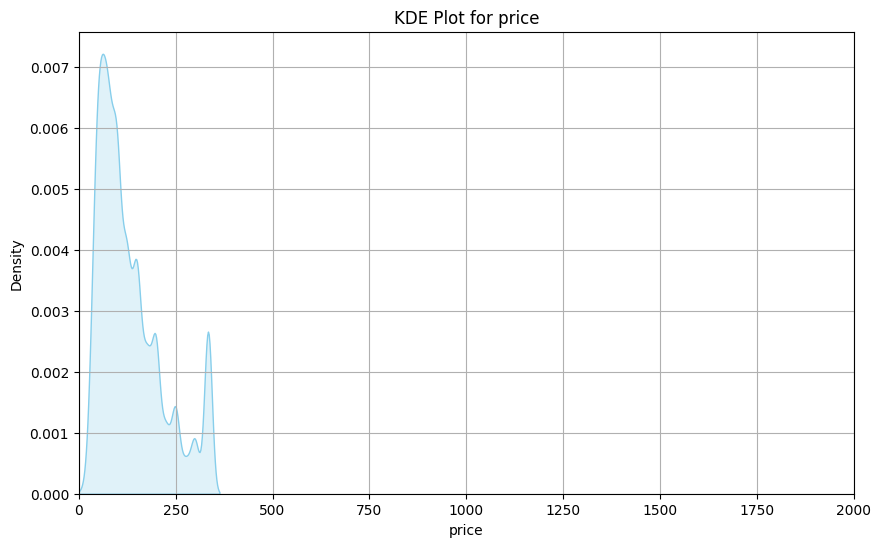

In [17]:
column_name = 'price'
plt.figure(figsize=(10,6))
sns.kdeplot(data[column_name], shade=True, color='skyblue')
plt.title(f'KDE Plot for {column_name}')
plt.xlabel(column_name)
plt.ylabel('Density')
plt.xlim(0,2000)
plt.grid(True)
plt.show()
# we will be calculating the price distribution for the given listings.
# we have visualised that the prize range is 0 to 200 and very less will be on the range>1000.

From this garph we conclude that the prices of listings mostly lie between range of $50-$200.

**Top hosts according to number of times hosted**

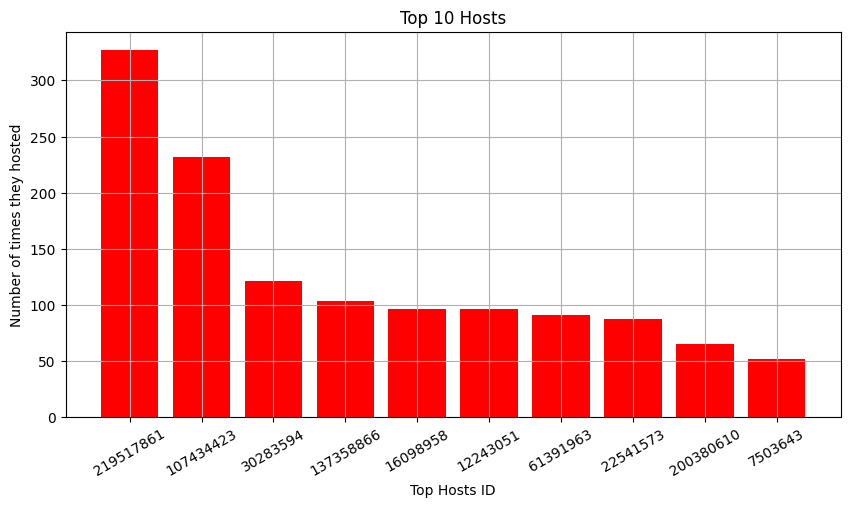

In [18]:
top_hosts = data['host_id'].value_counts().head(10)
top_hosts_id = list(map(lambda x : str(x) , top_hosts.keys()))
top_hosts_count = list(top_hosts)

plt.figure(figsize=(10,5))
plt.bar(top_hosts_id, top_hosts_count, color = 'r')
plt.grid(True)
plt.title('Top 10 Hosts')
plt.xticks(rotation = 30)
plt.xlabel('Top Hosts ID')
plt.ylabel('Number of times they hosted')
plt.show()

*  From this graph we conclude we can see that this host '219517861' is the  best host with most number of times property hosted.
*   
Identifying top hosts is valuable for Airbnb as it can lead to **collaborations** , **recognition** and **potential incentives** for these hosts further more leading the hosts to provide their best services and in return getting positive customer feedback.

**Average price by neighbourhood group**

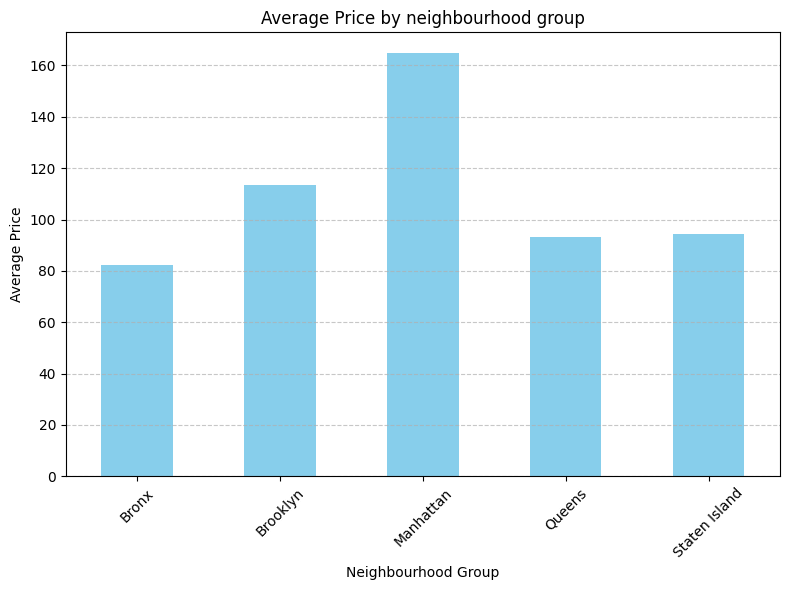

In [19]:
average_price_by_neighbourhood = data.groupby('neighbourhood_group')['price'].mean()
plt.figure(figsize=(8,6))
average_price_by_neighbourhood.plot(kind='bar',color='skyblue')
plt.title('Average Price by neighbourhood group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

*   From this graph we can conclude that Manhattan has highest average price of $165 .

*   Identifying average price of the hosts helps airbnb to set competitve marketing prices.

*   Knowing the average prices helps airbnb to segment the market effictively . They can cater to different customer segments from budget friendly options to premium accomodations.

*   Understanding pricing dynamics of neighbourhood cities, Airbnb can prioritise their expansion growth accordingly.

*   Area with more demand have higher prices and
*   List item



**Distribution of listing across neighbouring groups**

<ipython-input-20-52e3039e6553>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=data,palette='viridis' )


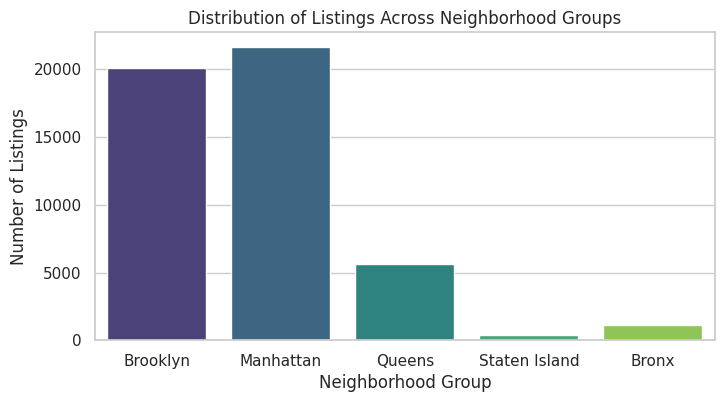

In [20]:
# distribution of listings across neighboruing groups
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
sns.countplot(x='neighbourhood_group', data=data,palette='viridis' )
plt.title('Distribution of Listings Across Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.show()

*   From this graph we can conclude that **Manhattan** has **highest** number of
    listings concentration and **State Island** has **lowest** number of listing concentration.
*   Provides an idea about **geographical distribution** of airbnbs listings.

*   Graph gives an idea about popular or growing areas allowing the firm to focus on **marketing efforts**, targeted marketing strategies propotionally **attracting more guests** to respective neighbourhoods.


*   Gives an idea about supply and competition amongst neighbouring groups.
Areas with higher concentration->more competition->competitive pricing->better accomodations.

**Distribution of reviews_per_month for each neighbourhood_group**

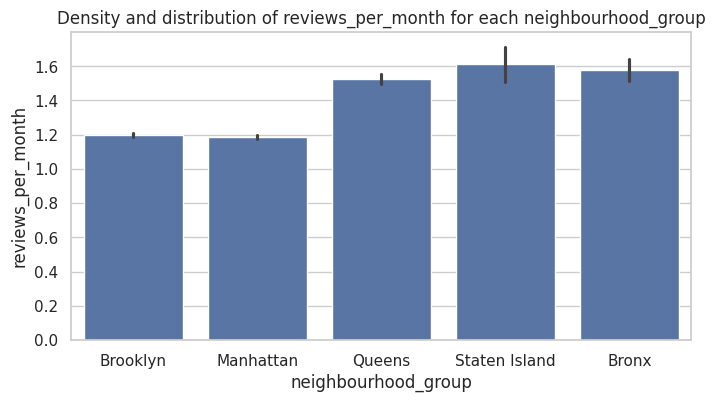

In [21]:
# distribution of review_per_month for each neighbourhood_groups
plt.figure(figsize = (8,4))
plt.title('Density and distribution of reviews_per_month for each neighbourhood_group')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=data)
plt.show()

* From this graph we conclude that **Queens,State island and Bronx** have highest number of **reviews_per_month**.

*   Neighbourhood with **higher density** of **reviews_per_month** are more likely to be popular amongst travellers.

*   Neighbourhood groups with **higher densitites** may experience strong demand from customers -> leading to **higher occupancy rates** -> **high rental income for hosts.**
*   More reviews may be due to differnet features that that the locality may provide like **cultural events or dining options.**

**Distribution of price for each room type**

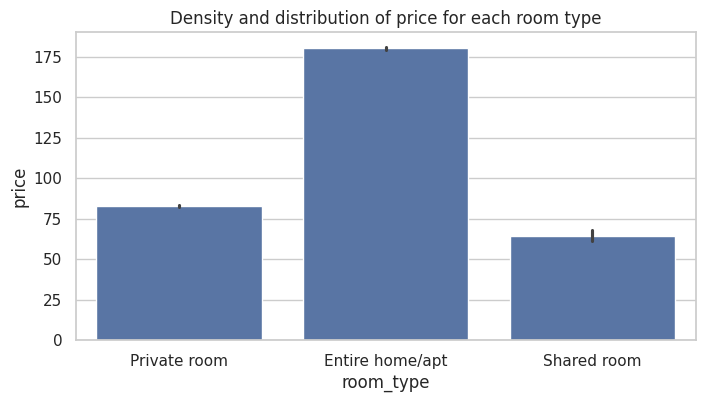

In [22]:
# average price for each room type.
plt.figure(figsize=(8,4))
sns.barplot(x='room_type',y="price",data=data)
plt.title('Density and distribution of price for each room type')
plt.show()

*   From this graph we conclude Entire home/apt are costly
*   Understanding the pricing dynamics of rooms can help airbnb to set competitive and market driven pricing.

*   This information can help potential guest to understand the value proposition of every room type by comparing prices with review and location.

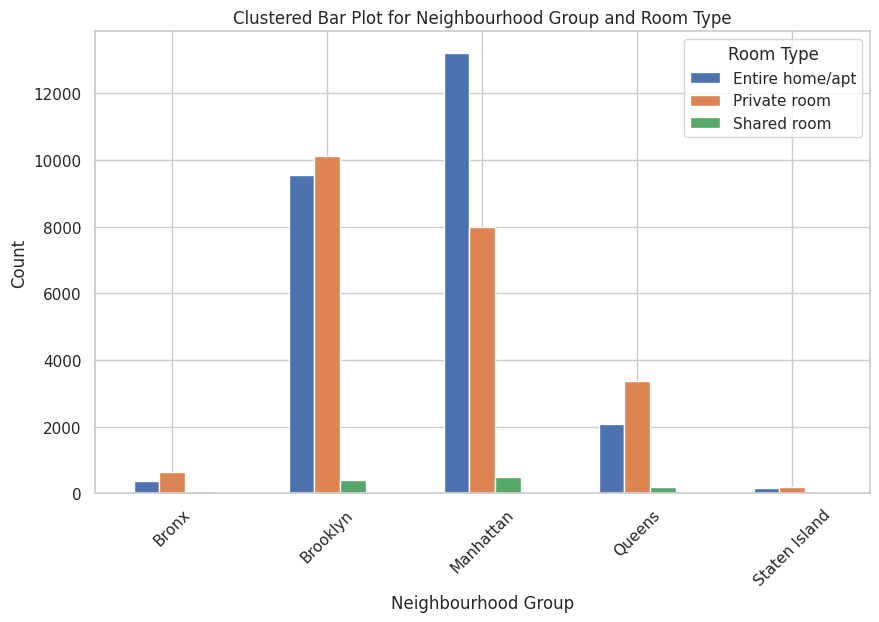

In [23]:
grouped_data = data.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

# Reshape the grouped data into a pivot table
pivot_table = grouped_data.pivot(index='neighbourhood_group', columns='room_type', values='count')

# Plotting the clustered bar plot
pivot_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Clustered Bar Plot for Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

* From this graph we conclude that guests in **Brookly** and **Manhattan** prefer to stay in entire apartment thus having **high purchasing power** amongst all whereas in **Bronx,Queens and staten island** guests prefer to have **private room** thus depicting **medium-low purchasing power.**
   
*   Gives great insights for investors and real-estate agent making them understand supply and demand dynamics for neighbouring groups.

**Density and Distribution of miniumn_nights for each room type**

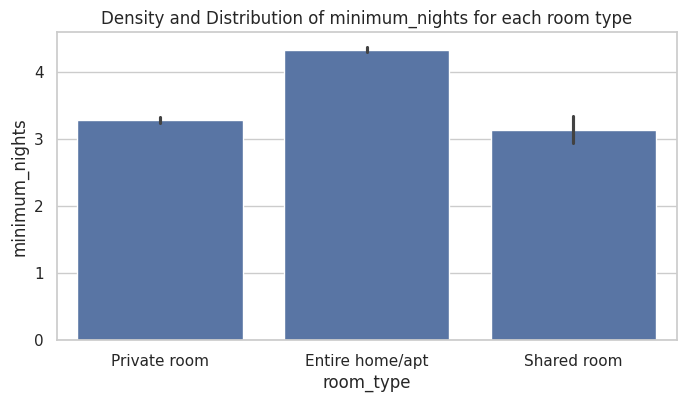

In [24]:
plt.figure(figsize = (8,4))
plt.title('Density and Distribution of minimum_nights for each room type')
sns.barplot(x = 'room_type', y = 'minimum_nights', data = data)
plt.show()


*   From this graph we observe that average of minimum night a person has to spend in Entire home/apt room type is more than other room types listed on Airbnb i,e. private room and shared room.
*   It allows Airbnb to set competitive pricing, identify price ranges that attract more bookings.

*   It allows Airbnb to identify guests preferences with guests having shorter stays having lower minimum nights requirments while those planning longer stays may be having longer minimum nights.

**Distribution of availability_365 for each neighbourhood_group**

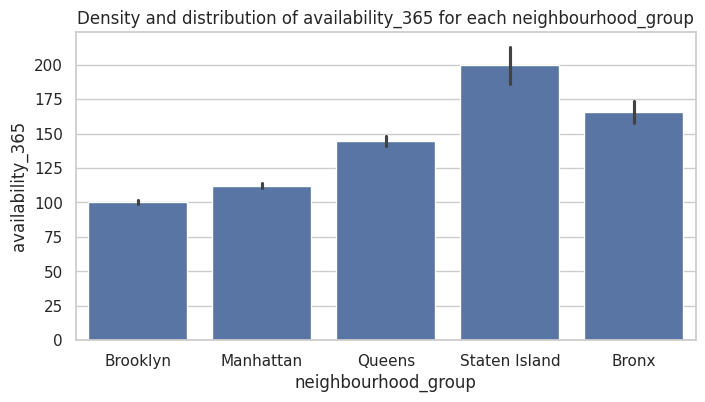

In [25]:
plt.figure(figsize = (8,4))
plt.title('Density and distribution of availability_365 for each neighbourhood_group')
sns.barplot(x='neighbourhood_group', y="availability_365", data=data)
plt.show()

*   From this graph we observe that in **Staten Island** the property is available for **higher period** of time and in **Queens and Bronx** the property is **less available** for booking.

*   **Higher availability** of rooms may depict **lower demand** and **lower availability** depict higher demand.

*   This visualisation can help guests to make informed decisions about their bookings and stays at a particular neighbourhood_groups.

**Geographical distribution of listings by neighbouring groups**

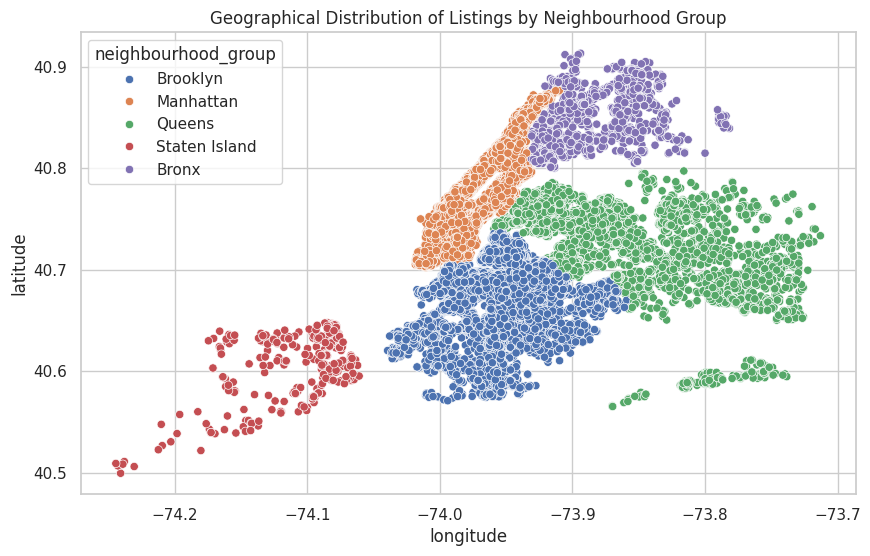

In [26]:
plt.figure(figsize= (10,6))
plt.title('Geographical Distribution of Listings by Neighbourhood Group')

sns.scatterplot(x = data.longitude, y = data.latitude,hue = data.neighbourhood_group)
plt.show()



*   This plot provides insights about geographical distribution of listings.

*   Above we have already seen that Manhattan and Brooklyn has higher number of listings but as per plot we can see that a small area has higher number of listings in both Manhattan and Brooklyn which indicates higher market density.
*   We also observe that Queens has larger area with lower listings as compared to it depicting lower market density.

* Understanding geographical distribution can help in targeting specific audiences and optimizing services based on regional preferences.   



**Distribution of average prices by neighbouring group and room type**

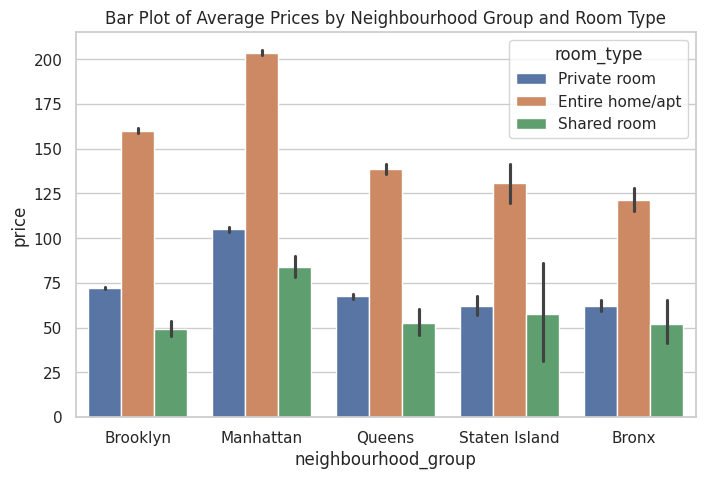

In [27]:
plt.figure(figsize=(8,5))
plt.title('Bar Plot of Average Prices by Neighbourhood Group and Room Type')
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = data)
plt.show()

*   The bar plot offers insights into the average prices for different room types (room_type) within each neighbourhood group (neighbourhood_group).
*   Here we can observe that from the plot we can definietely say that Manhattan is a standard location as the price of each room type is more compare to room type in other neighbouhood groups.


*   Prices of room type in Queens, Staten Island, Bronx are approximately similar.

*   The insights gained from this visualization can inform pricing strategies for different room types within specific neighbourhoods.


*   Airbnb can tailor pricing promotions, discounts, or marketing efforts based on the observed patterns.

**Distribution of reviews_per_month by neighbourhood_group and room type**

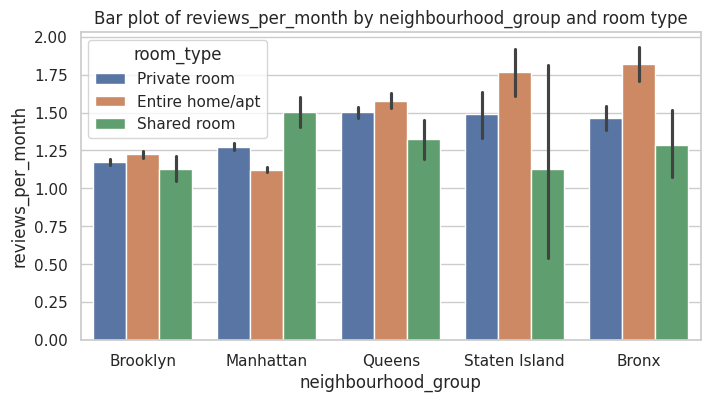

In [28]:
plt.figure(figsize = (8,4))
plt.title('Bar plot of reviews_per_month by neighbourhood_group and room type')
sns.barplot(x='neighbourhood_group', y="reviews_per_month",hue="room_type", data=data)
plt.show()

*   This plot gives an idea about guest satisfaction levels as listings with higher review frequency depict higher satisfaction levels amongst guests.

*   In Manhattan shared rooms and private rooms are popular choices amongst guests and in state island and bronx private rooms are popular choices.

*   Hosts and stakeholders can use this information to adapt their strategies and offerings to meet evolving guest expectations.

**Coorelation matrix for the dataset**

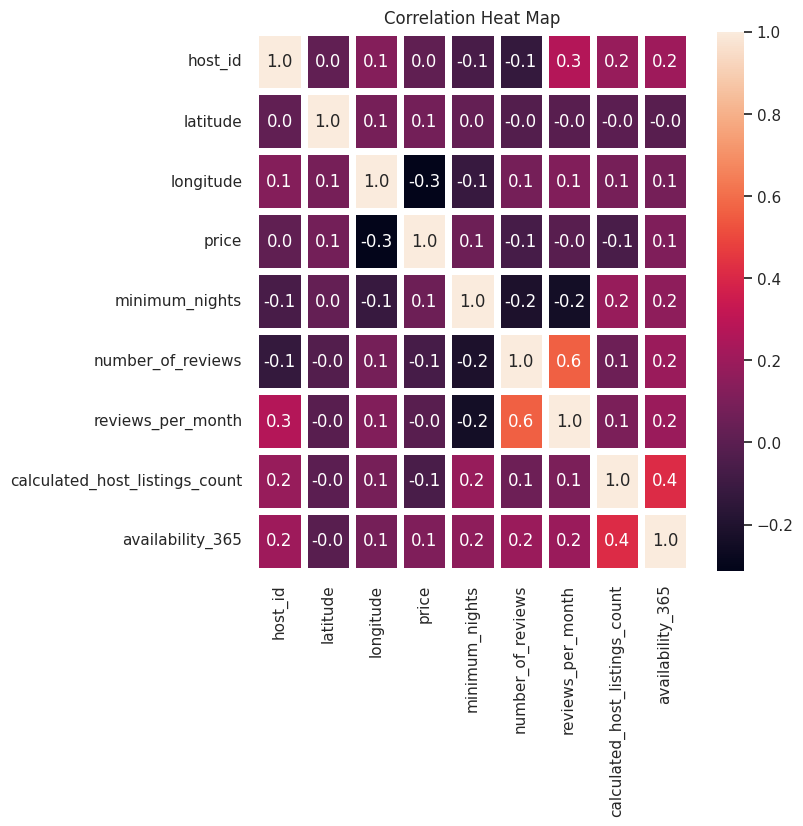

In [29]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Visualization of Correlation Heat Map
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation Heat Map')
# Use only numeric columns for correlation matrix
sns.heatmap(data[numeric_columns].corr(), annot=True, linewidths=5, fmt='.1f', ax=ax)
plt.show()

*   The heatmap provides insights into the correlation patterns between various numerical variables in the dataset.
*   Here we can observe that number_of_reviews and reviews_per_month both these columns are highly correlated compared to other columns.


*   Listings that receive a high number of reviews overall are likely to maintain a relatively consistent rate of reviews over time.

*   Here we observe that calculated_host_listings_count and availability_365 have good positive coorelation implying that hosts with a higher number of listings tend to have their listings available for rent more often throughout the year.


**Conslusion**



1.   First we observed that 52% of data is comprising of private rooms and 45.7% of data is comprising of entire room and rest is for shared room.
2.   Then we observed that 40% of data is comprising of manhattan,brookyln and rest is for state island , bronx and queens.

1.  We observed geographical distributions of listings across different neighbourhood groups and concluded that manhattan and brooklyn have high number of listings concentrated inside a smaller area therfore may implying high competitions whereas queens has less listings in larger area span thus implying less competition.

1.   Here are few key performing indicators for hosts:


*   **Average price:** Average price for manhattan is 160  and for brookly, queens and staten island is $100.

*   **No of listings:**No of listings are max for brooklyn and manhattan is approx. 20000

*   **Review_per_month:** No of reviews per month are 1.50 for staten island,bronx and queens and for brooklyn and manhattan it is 1.25.
*   **Availability_365:**State island has highest number of days available for booking i.e 200 and for queens and bronx it is 175 and for manhattan and brooklyn it is 100.




5.   Important features influencing rental prices and occupancy rates:


*   **Room_type:** We can observe that shared rooms and private rooms both have 75 each and entire room/apt are on expensive side i.e 175$.
*   **Min Nights spend**: More the nights spend more is the occupancy rates hence more profit . Therefore we observe that private rooms and shared have same number of nights spend on i.e 3. Whereas in Entire room/apt the min nights spend are 4
Therfore people with entire room tend to experience longer stays.


*   **Availability_365:** State island has highest number of days available for booking i.e 200 and for queens and bronx it is 175 and for manhattan and brooklyn it is 100.
6. At last we observed a **strong coorelation** between **no of reviews** and **reviews per month**.